# PPCA

$\mathcal{N}(z|0, \mu, \sigma^2)$

In [38]:
# from plot import *
from sampling import *

import numpy as np
import scipy.linalg as sl
from pathlib import Path


def import_data() -> np.array:
    fname = "data.txt"
    f = open(fname,'r')
    data = []
    for line in f:
        s = line.split()
        data.append([float(s[0]),float(s[1])])
    f.close()

    return np.array(data)


class ppca:

    def __init__(self, X=None, num_components=1, verbose=False):

        self.q = num_components
        self.d = X.shape[1]
        self.mu = None
        self.sigma2 = None
        self.weights = None
        self.verbose = verbose

        if X is not None:
            self.fit(X)


    def fit(self, X):

        # calculate maximum likelihood means
        self.mu = np.mean(X, axis=0)

        # Calcualte maximum likelihood variance
        data_cov = np.cov(X, rowvar=False)
        lambdas, eigenvecs = np.linalg.eig(data_cov)
        idx = lambdas.argsort()[::-1]   
        lambdas = lambdas[idx]
        eigenvecs = - eigenvecs[:,idx]

        self.sigma2 = (1.0 / (self.d-self.q)) * sum([lambdas[j] for j in range(self.q, self.d)])

        # Calculate maximum likelihood Weight matrix
        uq = eigenvecs[:,:self.q]
        lambdaq = np.diag(lambdas[:self.q])
        
        self.weights = uq * np.sqrt(lambdaq - self.sigma2 * np.eye(self.q))

        if self.verbose:
            print("eigenvectors:")
            print(eigenvecs)
            print(eigenvecs @ np.diag(lambdas) @ np.transpose(eigenvecs))
            print(f"Var ML: {self.sigma2 }")
            print(f"uq: {uq}")
            print(f"weights: {self.weights}")


    def predict(self, Xtest):

        q = self.q
        m = np.transpose(self.weights) @ self.weights + self.sigma2 * np.eye(q)

        cov = self.sigma2 * np.linalg.inv(m)
        act_hidden = []
            
        mean = np.linalg.inv(m) @ np.transpose(self.weights) @ (data_visible - self.mu)
        sample = np.random.multivariate_normal(mean,cov,size=1)
        act_hidden.append(sample[0])
        
        return np.array(act_hidden)


---

Data mean:
[2662.32666667 3019.5       ]
Data cov:
[[24828.9596868    102.74161074]
 [  102.74161074   218.01006711]]


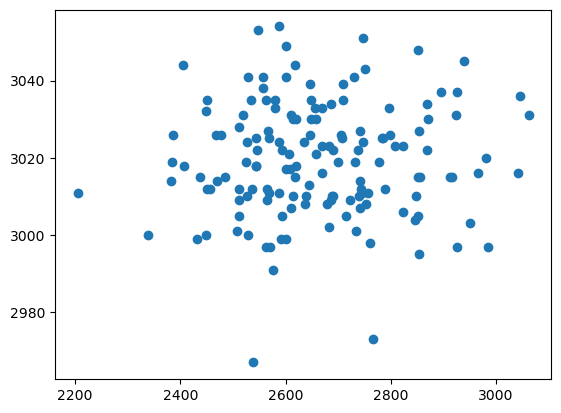

In [27]:
# --------------------------------------------

# Import data

#
import matplotlib.pyplot as plt

data = import_data()

# figs = {}
# figs["data"] = plot_hist_2d(data, "Data")

d = data.shape[1]
plt.plot(data[:, 0], data[:, 1], 'o')
print("\n---\n")

mu_ml = np.mean(data,axis=0)
print("Data mean:")
print(mu_ml)

data_cov = np.cov(data,rowvar=False)
print("Data cov:")
print(data_cov)



---

Var ML:
217.58116636932957
uq:
[[-0.99999129]
 [-0.00417452]]
lambdaq
[[24829.38858755]]
Weight matrix ML:
[[-156.88014062]
 [  -0.65490514]]


(array([ 4.,  9., 16., 22., 25., 37., 25., 10.,  1.,  1.]),
 array([-2.62092802, -2.06199535, -1.50306268, -0.94413002, -0.38519735,
         0.17373532,  0.73266798,  1.29160065,  1.85053332,  2.40946599,
         2.96839865]),
 <BarContainer object of 10 artists>)

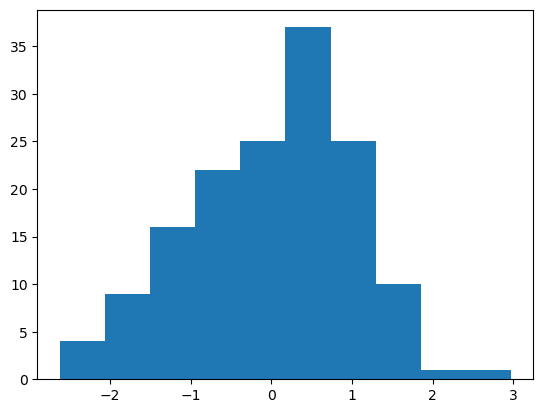

In [28]:
# -------------------------------------------------------------------

# Max. likelihood

#

print("\n---\n")

# No hidden variables < no visibles = d
q = 1

# Variance
lambdas, eigenvecs = np.linalg.eig(data_cov)
idx = lambdas.argsort()[::-1]   
lambdas = lambdas[idx]
eigenvecs = - eigenvecs[:,idx]

var_ml = (1.0 / (d-q)) * sum([lambdas[j] for j in range(q,d)])
print("Var ML:")
print(var_ml)

# Weight matrix
uq = eigenvecs[:,:q]
print("uq:")
print(uq)

lambdaq = np.diag(lambdas[:q])
print("lambdaq")
print(lambdaq)

weight_ml = uq * np.sqrt(lambdaq - var_ml * np.eye(q))
print("Weight matrix ML:")
print(weight_ml)

def sample_hidden_given_visible(
    weight_ml : np.array, 
    mu_ml : np.array,
    var_ml : float,
    visible_samples : np.array
    ) -> np.array:

    q = weight_ml.shape[1]
    m = np.transpose(weight_ml) @ weight_ml + var_ml * np.eye(q)

    cov = var_ml * np.linalg.inv(m)
    act_hidden = []
    for data_visible in visible_samples:
        mean = np.linalg.inv(m) @ np.transpose(weight_ml) @ (data_visible - mu_ml)
        sample = np.random.multivariate_normal(mean,cov,size=1)
        act_hidden.append(sample[0])
    
    return np.array(act_hidden)

act_hidden = sample_hidden_given_visible(
    weight_ml=weight_ml,
    mu_ml=mu_ml,
    var_ml=var_ml,
    visible_samples=data
    )

plt.hist(act_hidden)


---

Data mean:
[2662.32666667 3019.5       ]
Data cov:
[[24828.9596868    102.74161074]
 [  102.74161074   218.01006711]]


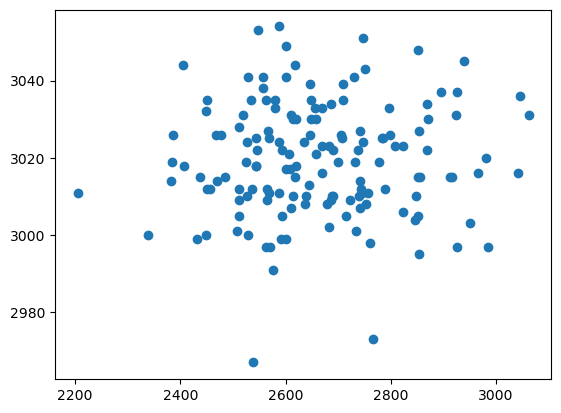

In [20]:
d = data.shape[1]
plt.plot(data[:, 0], data[:, 1], 'o')
print("\n---\n")

mu_ml = np.mean(data,axis=0)
print("Data mean:")
print(mu_ml)

data_cov = np.cov(data,rowvar=False)
print("Data cov:")
print(data_cov)

In [39]:
model = ppca(X=data, num_components=1)


mean_hidden = np.full(q,0)
cov_hidden = np.eye(q)

no_samples = len(data)
X_test = np.random.multivariate_normal(mean_hidden,cov_hidden,size=no_samples)
plt.hist(model.predict(X_test))

AttributeError: 'ppca' object has no attribute 'verbose'

In [ ]:
"C:\Users\johnk\Documents\projects\ubc\cpsc540\a3\data\mnist35.pkl"

def load_dataset(filename, *keys):
    if not filename.endswith(".pkl"):
        filename = filename + ".pkl"
    with open(Path("..", "data", filename), "rb") as (f):
        data = pickle.load(f)
        if not keys:
            return data
        return [data[k] for k in keys]